# Training YOLOv8 model for Object detection project for a self-driving car. 🚗

#### First we'll import the necessary libraries for our project

In [4]:
import os

In [5]:
import glob

In [7]:
from IPython.display import Image, display


In [8]:
!nvidia-smi

Thu Mar 21 03:10:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## ⬇️ installing ultralytics to be able to train the yolov8 model

In [9]:
!git clone https://github.com/Myworkss/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 3878, done.
remote: Total 3878 (delta 0), reused 0 (delta 0), pack-reused 3878
Receiving objects: 100% (3878/3878), 1.82 MiB | 28.28 MiB/s, done.
Resolving deltas: 100% (2693/2693), done.


In [10]:
HOME = os.getcwd()

In [11]:
print(HOME)

/kaggle/working


In [12]:
%cd /kaggle/working/ultralytics/

/kaggle/working/ultralytics


### installing the required libraries for the training

In [13]:
!pip install -e '.[dev]'

Obtaining file:///kaggle/working/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 84.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 98.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.1 MB/s eta 0:00:00
  Created wheel for ant

### importing ultalytics lib

In [14]:
import ultralytics

In [15]:
%cd {HOME}

/kaggle/working


### ✓ making sure that ultralytics have installed successfully

In [17]:
ultralytics.checks()

Ultralytics YOLOv8.0.3 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.8/8062.4 GB disk)


## installing the dataset 🗂️
(Here I used a dataset from Roboflow):
[https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6](http://)

In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ph01LJfJE6ORwEVXMxvE")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2


Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 9345.39it/s] 


# 🧠 Training the YOLOv8 model 

In [19]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data="/kaggle/working/Self-Driving-Cars-6/data.yaml" epochs=150 imgsz=640

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 330MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Self-Driving-Cars-6/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, wo

In [20]:
!ls {HOME}/runs/detect/train

F1_curve.png					   train_batch2.jpg
PR_curve.png					   train_batch30940.jpg
P_curve.png					   train_batch30941.jpg
R_curve.png					   train_batch30942.jpg
args.yaml					   val_batch0_labels.jpg
confusion_matrix.png				   val_batch0_pred.jpg
events.out.tfevents.1710990919.e92f4c6fd056.155.0  val_batch1_labels.jpg
predictions.json				   val_batch1_pred.jpg
results.csv					   val_batch2_labels.jpg
results.png					   val_batch2_pred.jpg
train_batch0.jpg				   weights
train_batch1.jpg


# 📈Displaying the confusion matrix and val batches
* ### Here we want to see how the model trained on the given data and how many times during training it confused the labels with each other

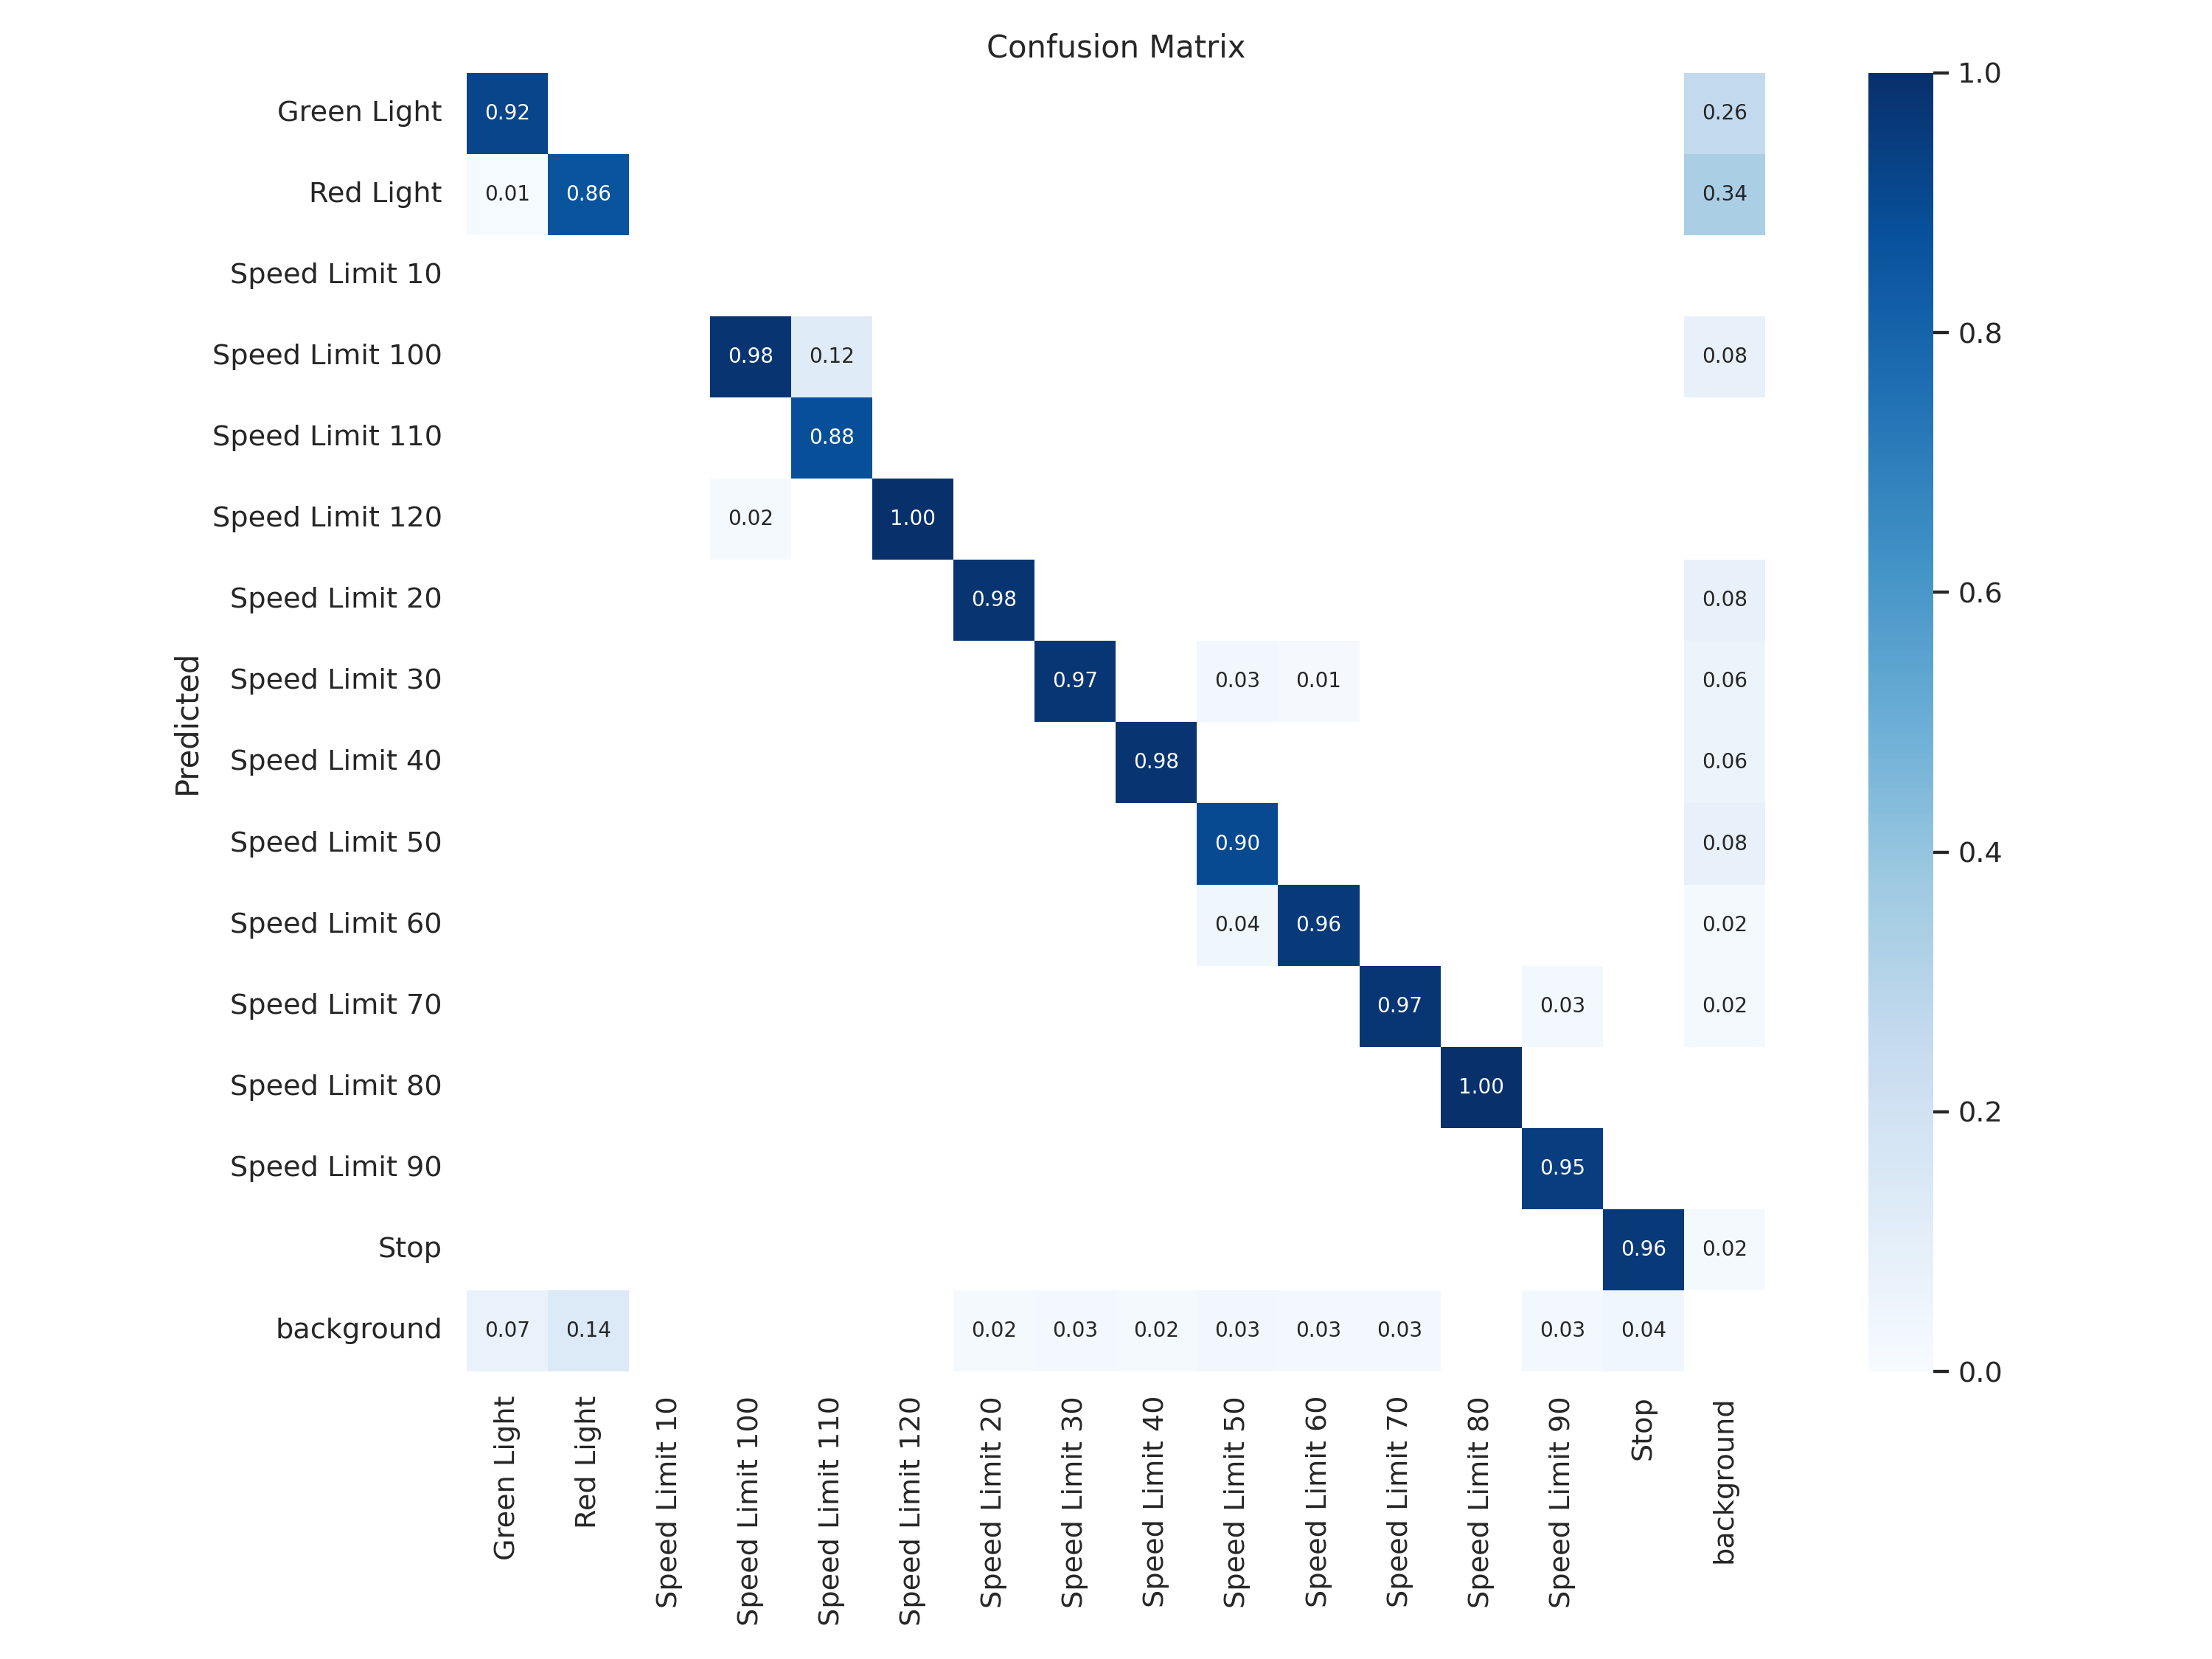

In [21]:
Image(filename= f"{HOME}/runs/detect/train/confusion_matrix.png")

* ## Validation batch for the labels

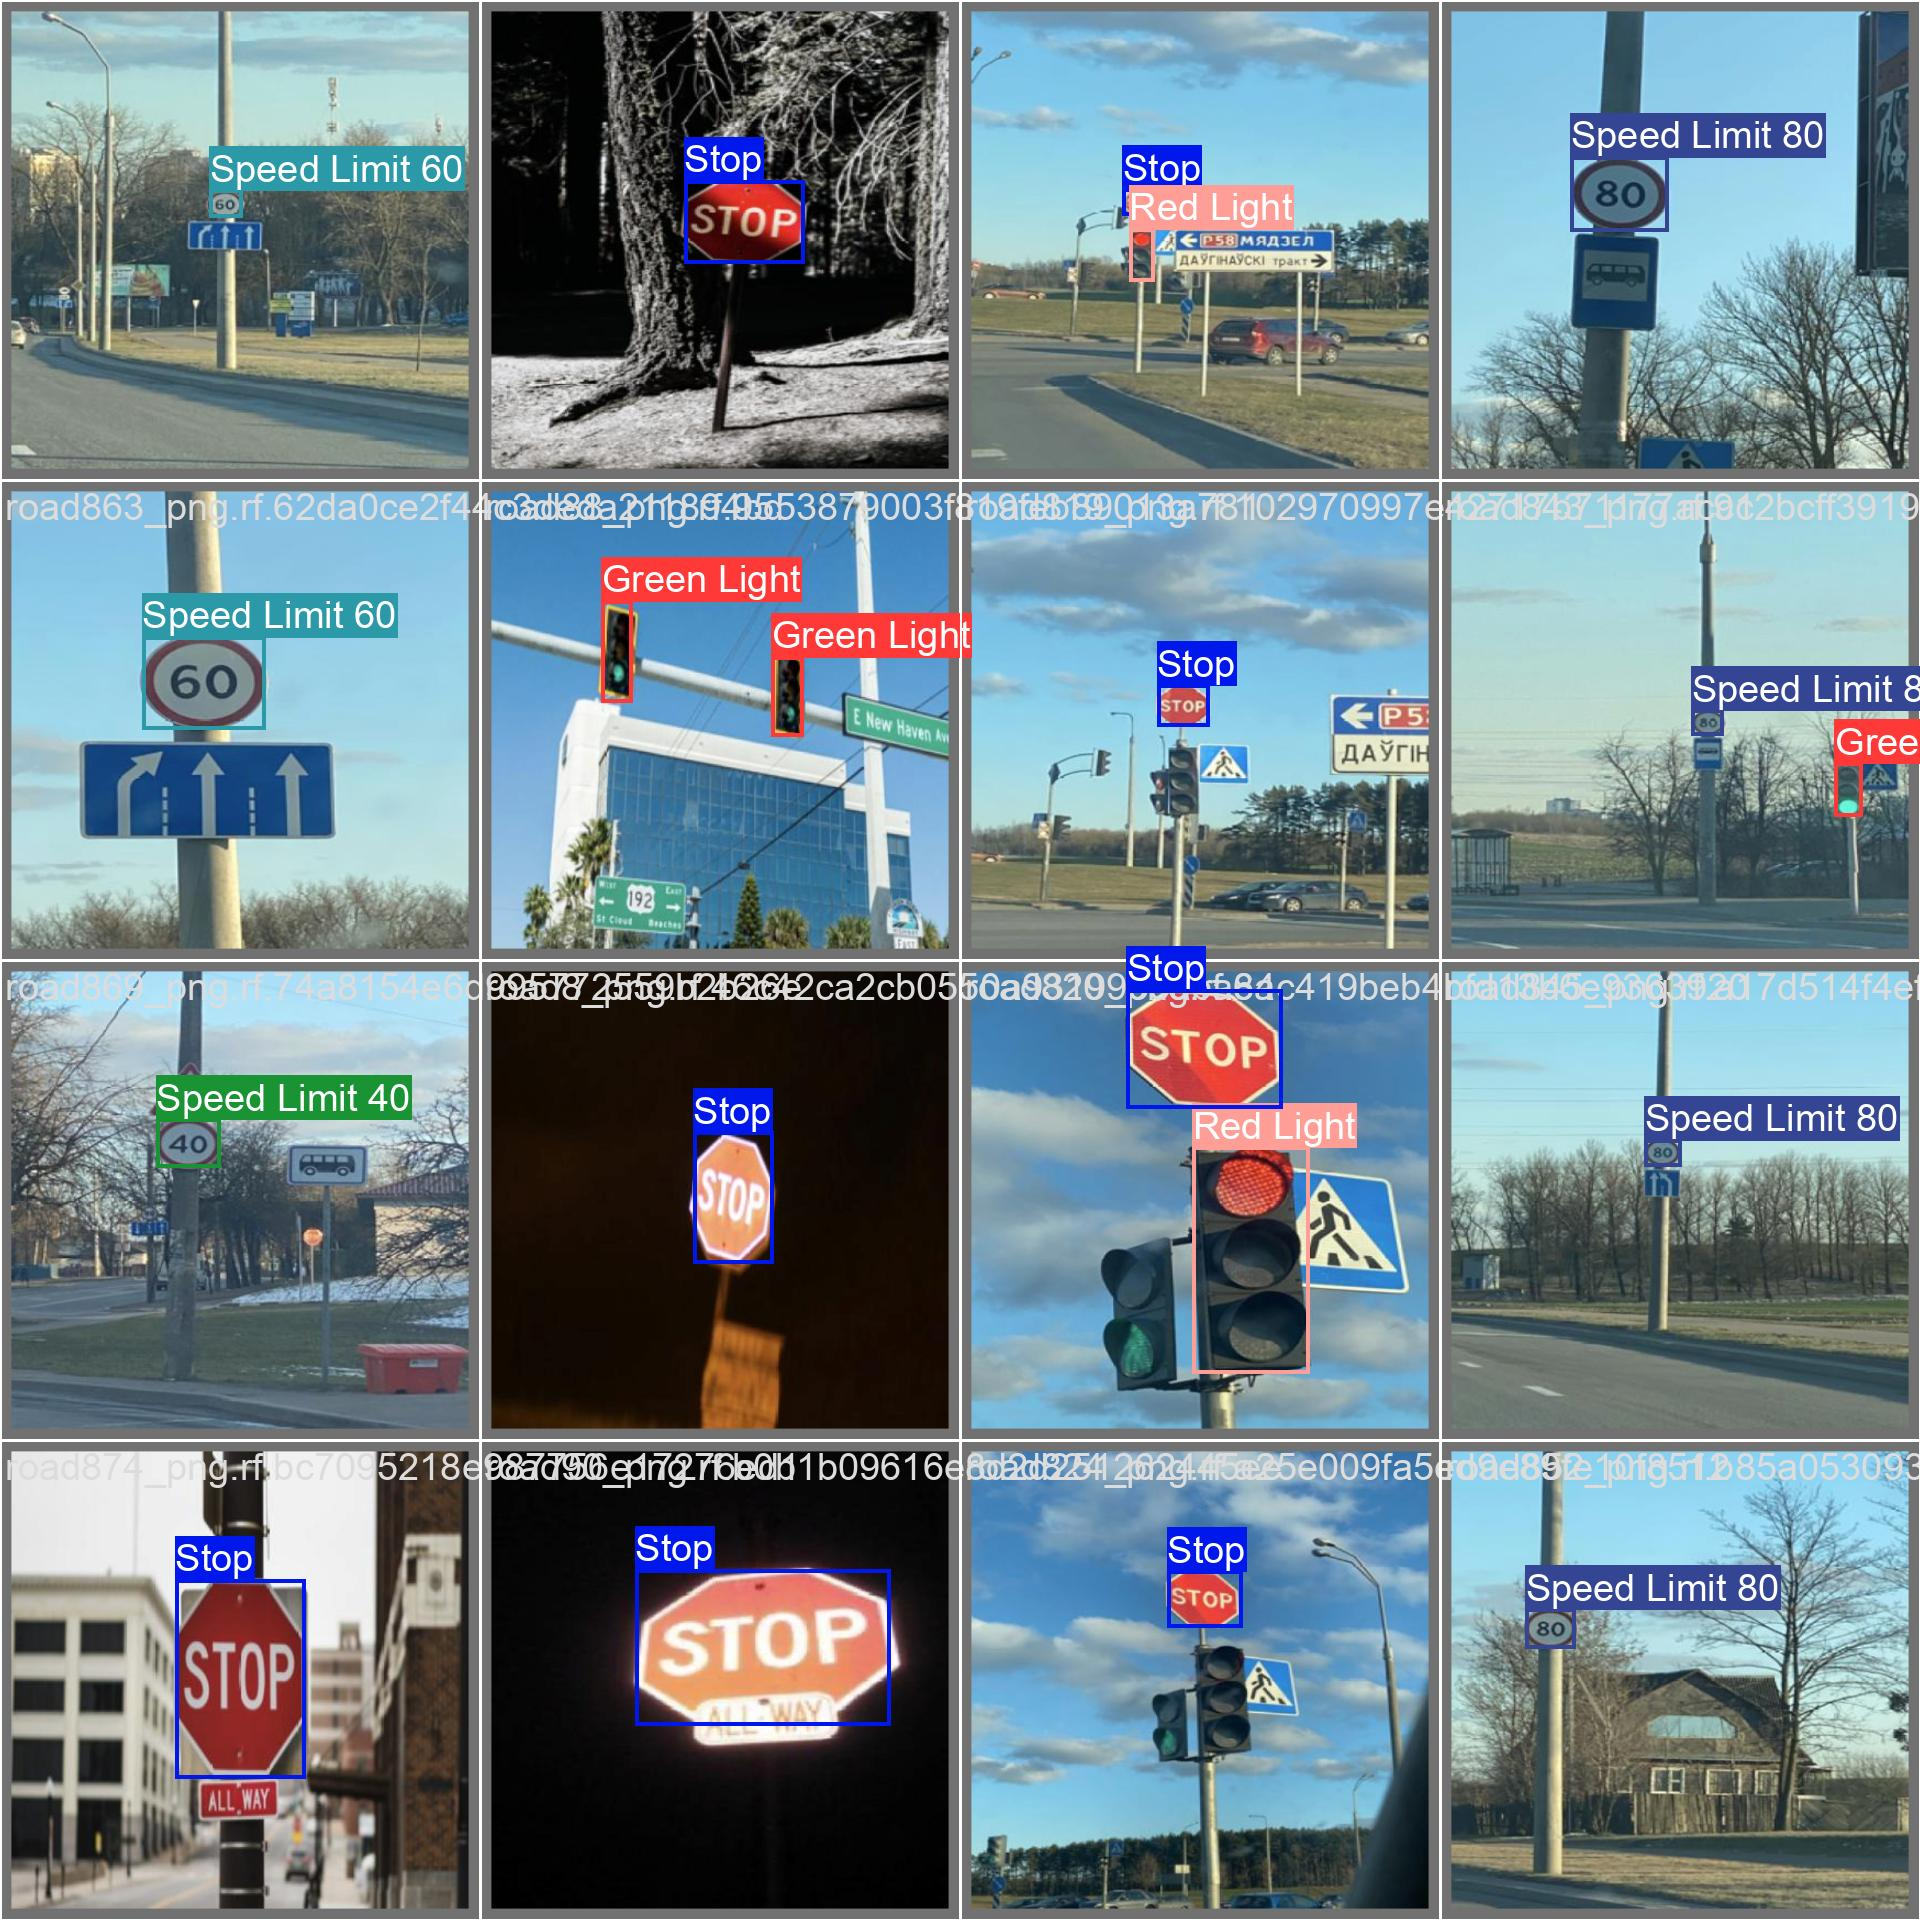

In [23]:
Image(filename= f"{HOME}/runs/detect/train/val_batch0_labels.jpg",height=500)

* ### these are the training results; like mertics for the training and percision 🎯

/kaggle/working


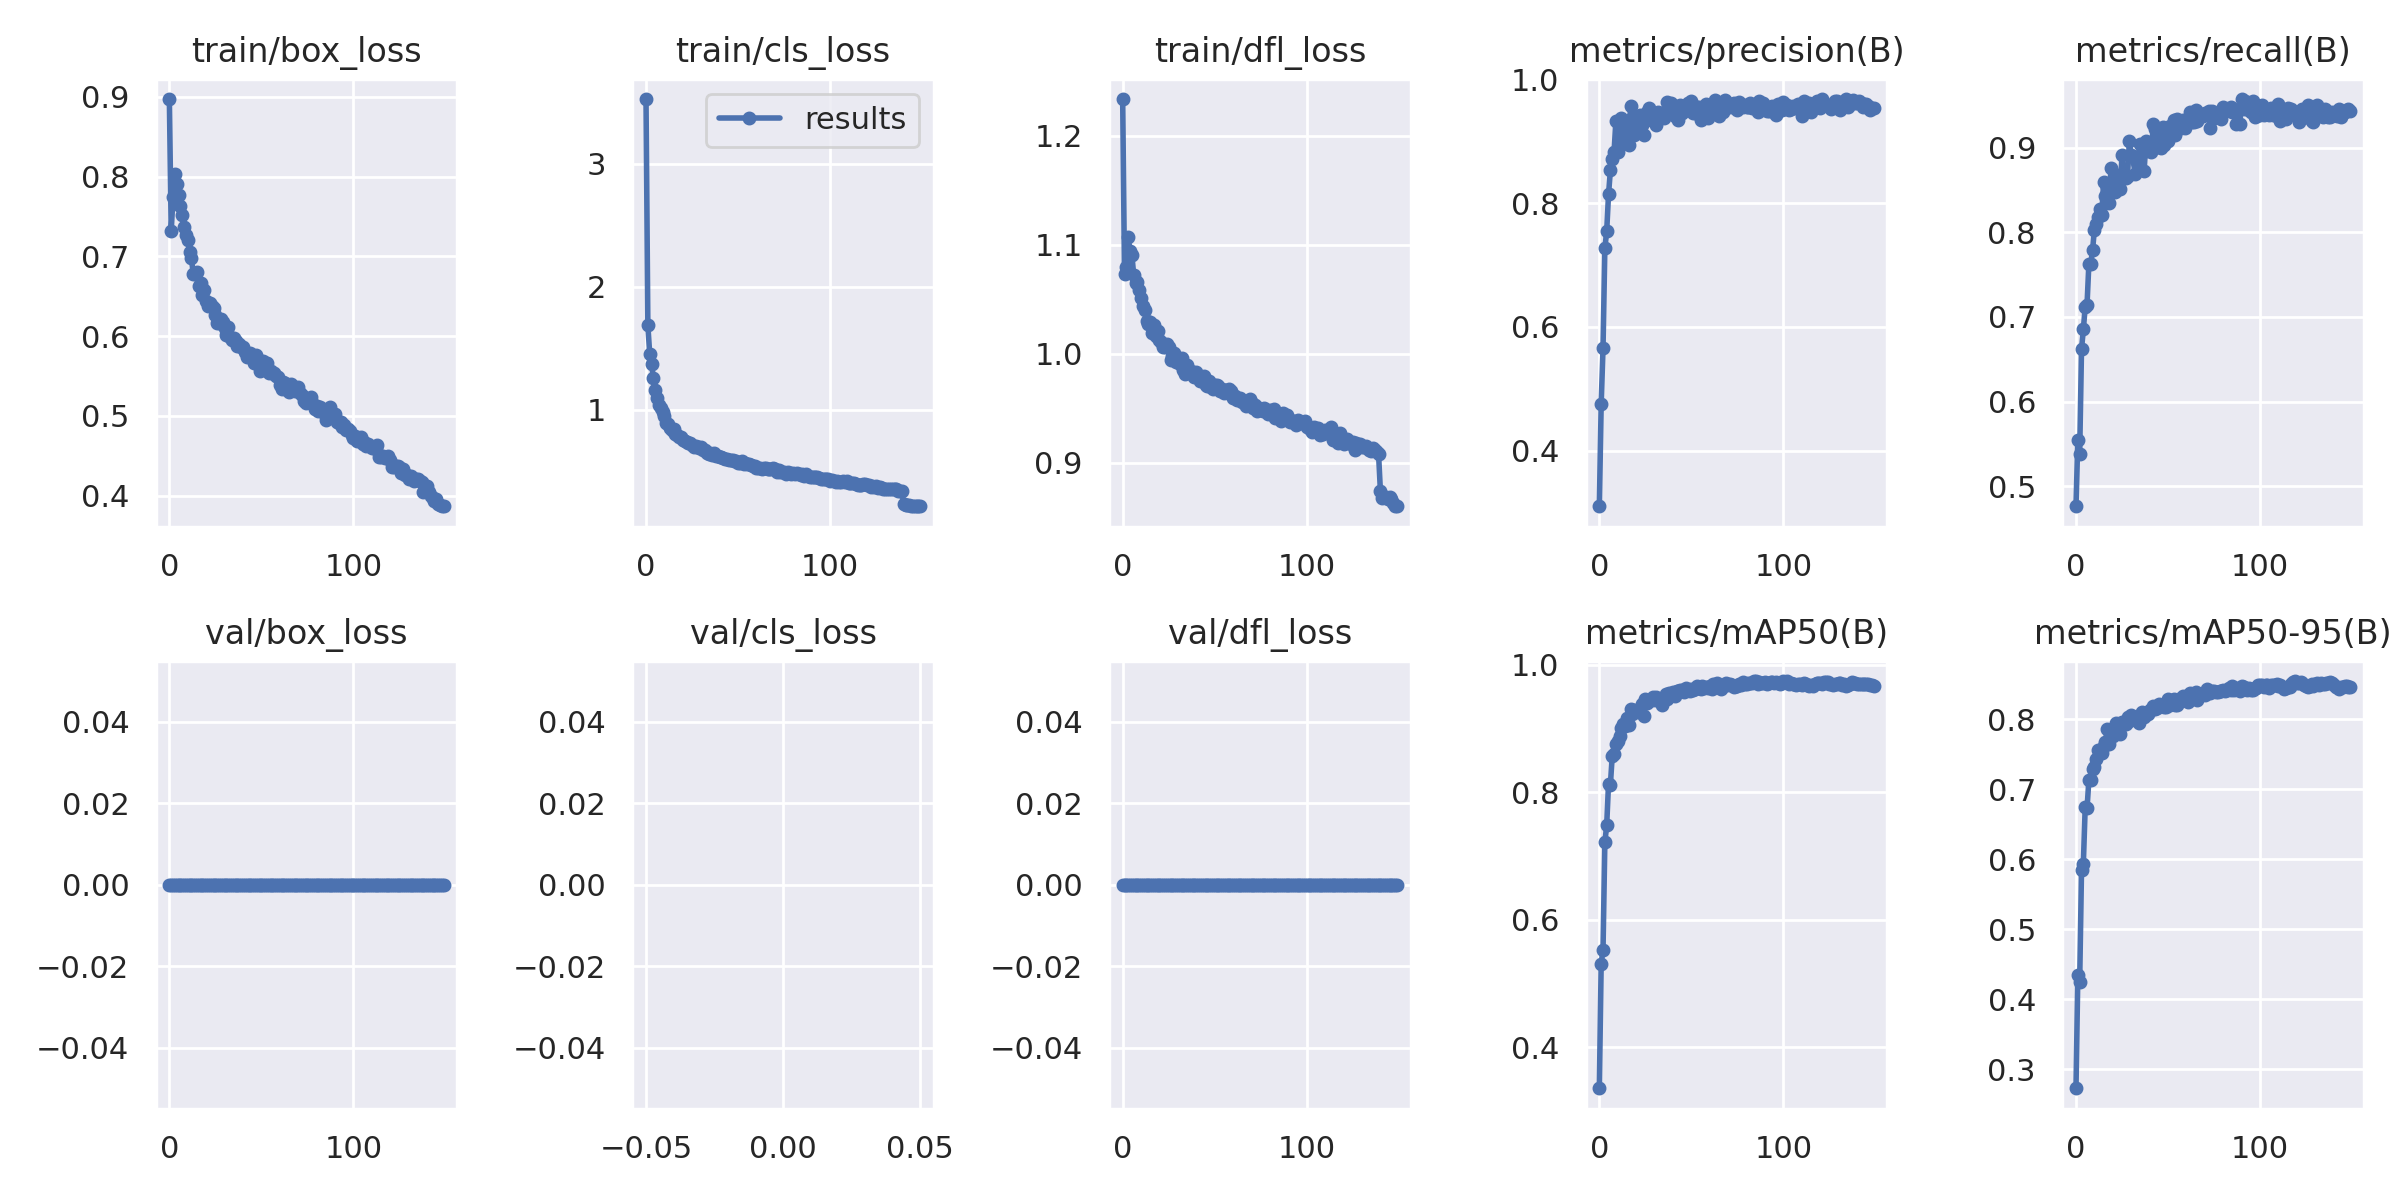

In [24]:
%cd {HOME}
Image(filename= f"{HOME}/runs/detect/train/results.png",width=600)

# ✅Validation for the model
### to see how well the model trained and the how percise its perdiction is. 

In [26]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

2024-03-21 06:42:39.667676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 06:42:39.667737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 06:42:39.669180: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.3 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Fusing layers... 
Model summary: 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/Self-Driving-Cars-6/valid/labels.cache... 801 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   a